![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Face Mask Prediction using U-Net
Task is to predict the mask around the face in a given image.

# Instructions
- Some part of the code is already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

## Dataset
Faces in images marked with bounding boxes. Have around 409 images with around 1000 faces manually tagged via bounding box.
- Data file name: images.npy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
print (tf.__version__)

2.4.0


### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [3]:
data = np.load('/content/drive/MyDrive/images.npy',allow_pickle=True)

### Check one sample from the loaded "images.npy" file  (2 marks)
- Hint: print data[10][1] 

In [4]:
print (data[10][1])

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.48, 'y': 0.10385756676557864}, {'x': 0.7716666666666666, 'y': 0.6795252225519288}], 'imageWidth': 600, 'imageHeight': 337}]


### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [5]:
IMAGE_HEIGHT=224
IMAGE_WIDTH=224

HEIGHT_CELLS = 28
WIDTH_CELLS = 28

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X" array
- Masks will be stored in "masks" array

In [6]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

#masks = np.zeros((int(data.shape[0]), HEIGHT_CELLS, WIDTH_CELLS))
masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


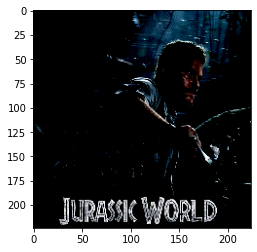

In [7]:
plt.imshow(X[50])

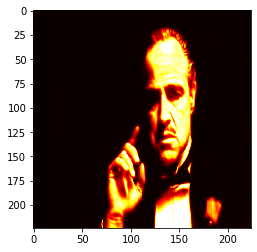

In [8]:
plt.imshow(X[10, ..., 0], cmap='hot')

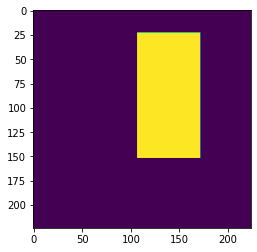

In [9]:
plt.imshow(masks[10].squeeze())

In [10]:
print(X.shape)
print(masks.shape)

(409, 224, 224, 3)
(409, 224, 224)


### Split the data into training and testing (2 marks)
- 400 images in training
- 9 images in testing data

Training data

In [11]:
#Taking 1st 400 inputs as Training Data
X_train = X[:400,:,:]
y_train = masks[:400,:,:]

Testing data

In [12]:
#Taking last 9 inputs as Testing Data
X_test = X[400:,:,:]
y_test = masks[400:,:,:]

In [13]:
#Splitting Training dataset for Training & Validation
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

### Print a sample training image, image array and its mask (2 marks)

Print the image and image array

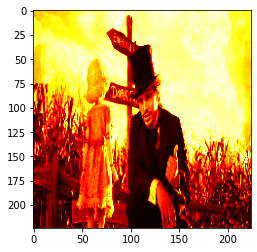

In [14]:
#plt.imshow(X_train[10])
plt.imshow(X_train[10, ..., 0], cmap='hot')

In [15]:
print(X_train[10])

[[[ 0.38823533  0.27058828  0.10588241]
  [ 0.34901965  0.23137259  0.082353  ]
  [ 0.34901965  0.22352946  0.10588241]
  ...
  [ 0.48235297  0.44313729  0.12941182]
  [ 0.51372552  0.41960788  0.14509809]
  [ 0.56078434  0.45882356  0.19215691]]

 [[ 0.37254906  0.25490201  0.09019613]
  [ 0.30980396  0.19215691  0.04313731]
  [ 0.32549024  0.20000005  0.082353  ]
  ...
  [ 0.49019611  0.45098042  0.13725495]
  [ 0.53725493  0.43529415  0.1686275 ]
  [ 0.58431375  0.48235297  0.21568632]]

 [[ 0.36470592  0.24705887  0.082353  ]
  [ 0.29411769  0.1686275   0.02745104]
  [ 0.30980396  0.18431377  0.05882359]
  ...
  [ 0.49803925  0.45882356  0.14509809]
  [ 0.57647061  0.47450984  0.20784318]
  [ 0.6156863   0.51372552  0.24705887]]

 ...

 [[-0.92941177 -0.92156863 -0.97647059]
  [-0.78823531 -0.84313726 -0.89019608]
  [-0.82745099 -0.89803922 -0.93725491]
  ...
  [-0.81960785 -0.89803922 -0.97647059]
  [-0.93725491 -0.94509804 -0.96078432]
  [-0.96862745 -0.96862745 -0.97647059]]

 [

Print the mask

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


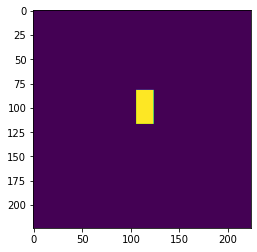

In [16]:
print(y_train[10])
plt.imshow(y_train[10].squeeze())

In [17]:
print(X_train.shape)
print(y_train.shape)

(340, 224, 224, 3)
(340, 224, 224)


In [18]:
print(X_valid.shape)
print(y_valid.shape)

(60, 224, 224, 3)
(60, 224, 224)


## Create the model (5 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [19]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D, Input
from tensorflow.keras.models import Model

def create_model(trainable=True):
    base_model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in base_model.layers:
        layer.trainable = trainable
  
    #block1 = base_model.get_layer("conv_pw_5_relu").output
    #block2 = base_model.get_layer("conv_pw_11_relu").output
    #block3 = base_model.get_layer("conv_pw_13_relu").output

    #x = Concatenate()([UpSampling2D()(block3), block2])
    #x = Concatenate()([UpSampling2D()(x), block1])

    #x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    #x = Reshape((HEIGHT_CELLS, WIDTH_CELLS))(x)

    block0 = base_model.get_layer("conv_pw_1_relu").output 
    block = base_model.get_layer("conv_pw_1_relu").output
    block1 = base_model.get_layer("conv_pw_3_relu").output
    block2 = base_model.get_layer("conv_pw_5_relu").output
    block3 = base_model.get_layer("conv_pw_11_relu").output
    block4 = base_model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block4), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block])
    x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)
    #x = Reshape((HEIGHT_CELLS, WIDTH_CELLS))(x)

    return Model(inputs=base_model.input, outputs=x)

### Call the create_model function (1 mark)
- Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)

In [20]:
model = create_model(False)

### Print model summary (1 mark)

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 112, 112, 32) 0           conv1_bn[0][0]                   
______________________________________________________________________________________________

### Define dice coefficient function (2 marks)
- Create a function to calculate dice coefficient


In [22]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

### Define loss function (2 marks)

In [23]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tf.math.log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

### Compile the model (2 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [24]:
import tensorflow as tf
from keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
# compile model
model.compile(optimizer='Adam', loss=loss, metrics=[dice_coefficient])

### Define callbacks (2 marks)
- Use ModelCheckpoint
- Use EarlyStopping
- Use ReduceLROnPlateau

In [25]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('model-bestloss.h5', 
                                                monitor='dice_coefficient', 
                                                save_best_only=True,
                                                save_weights_only=True, 
                                                mode='auto', 
                                                save_freq=1)
stop = tf.keras.callbacks.EarlyStopping(monitor='dice_coefficient', patience=5, mode='auto')
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='dice_coefficient', factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode='auto')

### Fit the model (2 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: use the callbacks defined above

In [26]:
history = model.fit(X_train,y_train,
                    batch_size=1,
                    epochs=10,
                    callbacks=[checkpoint, reduce_lr, stop],
                    validation_data=(X_valid, y_valid),
                    shuffle=True,
                    verbose=1)

Epoch 1/10
340/340 [==============================] - 17s 38ms/step - loss: 1.5066 - dice_coefficient: 0.4000 - val_loss: 0.9291 - val_dice_coefficient: 0.5331
Epoch 2/10
340/340 [==============================] - 10s 28ms/step - loss: 0.9448 - dice_coefficient: 0.5683 - val_loss: 0.8684 - val_dice_coefficient: 0.5553
Epoch 3/10
340/340 [==============================] - 10s 28ms/step - loss: 0.8279 - dice_coefficient: 0.5887 - val_loss: 0.9396 - val_dice_coefficient: 0.5513
Epoch 4/10
340/340 [==============================] - 10s 29ms/step - loss: 0.9399 - dice_coefficient: 0.6041 - val_loss: 0.8552 - val_dice_coefficient: 0.5638
Epoch 5/10
340/340 [==============================] - 10s 29ms/step - loss: 0.7509 - dice_coefficient: 0.6187 - val_loss: 0.8569 - val_dice_coefficient: 0.5620
Epoch 6/10
340/340 [==============================] - 10s 29ms/step - loss: 0.7119 - dice_coefficient: 0.6399 - val_loss: 0.8386 - val_dice_coefficient: 0.5699

Epoch 00006: ReduceLROnPlateau reducing

In [27]:
model.evaluate(X_valid, y_valid, batch_size=1, verbose=1)

60/60 [==============================] - 1s 19ms/step - loss: 0.8386 - dice_coefficient: 0.5699


[0.8386237621307373, 0.5699182748794556]

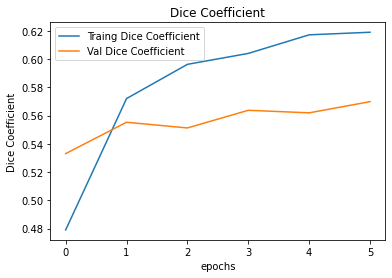

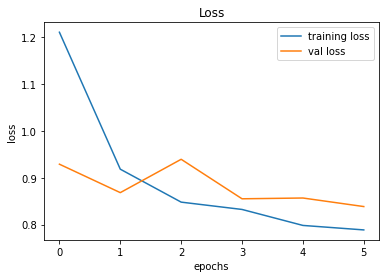

In [28]:
plt.figure(0)
plt.plot(history.history['dice_coefficient'], label='Traing Dice Coefficient')
plt.plot(history.history['val_dice_coefficient'], label='Val Dice Coefficient')
plt.title('Dice Coefficient')
plt.xlabel('epochs')
plt.ylabel('Dice Coefficient')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

### Get the predicted mask for a test image   (2 marks)

Show the test image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


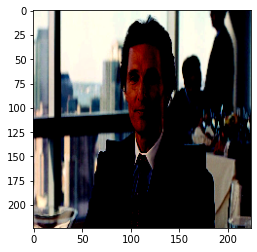

In [29]:
plt.imshow(X_test[3])

Show original mask for test image

In [30]:
y_test[3]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Predict the mask on the test image

In [31]:
preds = model.predict(X_test)

### Impose the mask on the test image (2 marks)
- In imshow use the alpha parameter and set it to greater than 0.5

In [32]:
def plot_sample(X, y, ix=None):
    if ix is None:
        ix = np.random.randint(0, len(X))

    has_mask = y[ix].max() > 0

    fig, ax = plt.subplots(1, 3, figsize=(20, 10))
    ax[0].imshow(X[ix, ..., 0], cmap='hot')
    if has_mask:
        ax[0].contour(y[ix].squeeze())
    ax[0].set_title('Image')

    ax[1].imshow(y[ix].squeeze())
    ax[1].set_title('Actual Mask')

    preds = model.predict(X,batch_size=1,verbose=1)
    ax[2].imshow(preds[ix].squeeze())
    if has_mask:
        ax[2].contour(preds[ix].squeeze(), colors='k', levels=[0.5])
    ax[2].set_title('Predicted Mask')
    

9/9 [==============================] - 0s 26ms/step


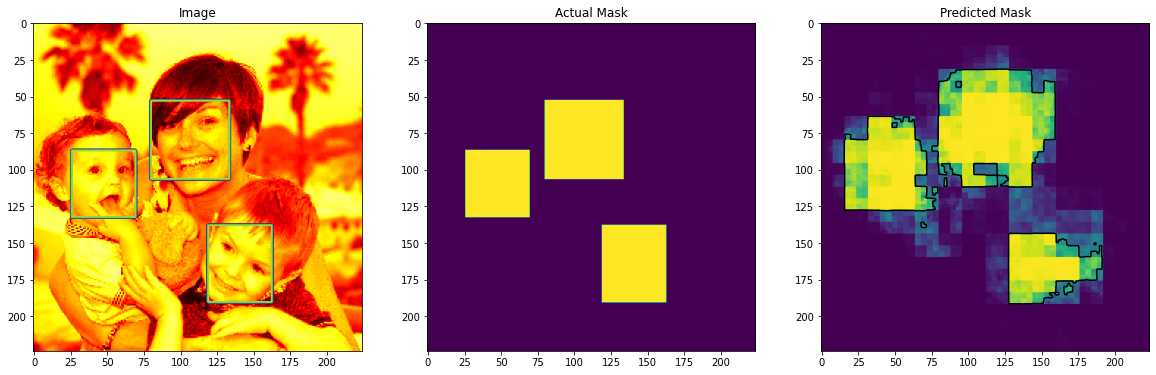

In [35]:
# Printing Test Image, Original Mask & Predicted Mask associated with the Test Image
plot_sample(X_test, y_test)

-------------